# Stock Trades by Members of the US House of Representatives

This project uses public data about the stock trades made by members of the US House of Representatives. This data is collected and maintained by Timothy Carambat as part of the [House Stock Watcher](https://housestockwatcher.com/) project. The project describes itself as follows:

> With recent and ongoing investigations of incumbent congressional members being investigated for potentially violating the STOCK act. This website compiles this publicly available information in a format that is easier to digest then the original PDF source.
>
> Members of Congress must report periodic reports of their asset transactions. This website is purely for an informative purpose and aid in transparency.
>
> This site does not manipluate or censor any of the information from the original source. All data is transcribed by our community of contributors, which you can join for free by going to our transcription tool. Our moderation team takes great care in ensuring the accuracy of the information.
>
> This site is built and maintained by Timothy Carambat and supported with our contributors.

# Summary of Findings

### Introduction
The dataset we are exploring in this project was collected and maintained by Timothy Carambat as part of the House Stock Watcher project, which includes information on the trading history of congresspeople from 2020 to 2021. 

In this project, we are interested in exploring the relationship between the **trading frequency of tickers** and their **win rates**. 
More specifically, we want to find out whether the number of times a ticker is traded is related to the win rate. By win rate, we mean the proportion of trades that had profits over 200 usd. Since the dataset we are using doesn't have records about the exact amount of returns on each trade, we are using captital gains over 200 usd as an alternative to define winning trades. 

Since people are more likely to trade the tickers that have higher chances of returns, we postulate that the most-traded tickers would have higher than average win rates.

<b>Research Question: </b> <br><br>
Is there a positive correlation between the number of times a ticker is traded and its win rate?


#### About the Dataset:
There are 15699 rows and 12 columns in this dataset, with each row containing information about a specific trade made by a congressman.

The columns are as follows:

<b>disclosure_year</b> - the year that the trade was disclosed <br>
<b>disclosure_date</b> - the date that the trade was disclosed <br>
<b>trasaction_date</b> - the date of the trade trasaction <br>
<b>owner</b> - the ownership status of the company traded <br>
<b>ticker</b> - the ticker of the company traded <br>
<b>asset_descriptions</b> - name & description of the company traded <br>
<b>type</b> - the type of transaction <br>
<b>amount</b> - the amount of money traded in usd <br>
<b>representative</b> - name of the representative <br>
<b>district</b> - the district the representative is in <br>
<b>ptr_link</b> - link to the disclosure document of the trade <br>
<b>cap_gains_over_200_usd</b> - Boolean value indicating if the trade made profits over 200 usd


### Cleaning and EDA

After an initial look at the dataset, we first dropped the columns that are completely irrelevant to our question of investigation. Namely, columns 'ptr_link', 'disclosure_year', 'disclosure_date', and 'transaction_date'.<br>
Then, we checked each column remaining in our dataset for missingness and found 3 columns with missing values in them -  'ticker', 'owner', and'asset_description'.
- There are 1296 rows that are missing **ticker**. The reason for this missingness will be explored in depth in the Assessment of Missingness section, but due to our research question being reliant on the 'ticker' column, we decided to drop these rows from our dataset. 
- For the rows with missing values in **owner** and **asset_description**, we decided to keep them in the dataset because the two columns are not immediately relavant to our research question.

At this stage of the project, we have kept some columns in the dataset despite their seeming irrelevance to our research question because we want to explore the potential correlations between and among these factors, which may offer us new insights to the dataset on potential relationships and questions to explore.


### Assessment of Missingness
In this section, we assessed the reason for the missingness in column `'ticker'` through a permutation test. More specifically, we investigated whether or not the missingness in the `'ticker'` column is correlated with any other columns (MAR - *Missing at Random*). Before proceeding with this investigation, we have ruled out the possibility of the column being NMAR - *Not Missing at Random* since the tickers that are missing cannot be due to those companies having no tickers for their stocks, therefore the missingness is not due to the value itself.

After rounds of permutation tests, we found that the missingness in column `'ticker'` is correlated with the column `'amount'`, which suggests that trades with particular trading amounts may be more likely to have missing tickers than others. 


### Hypothesis Test

We want to find out whether the number of times a ticker is traded is related to the profitability of that ticker. To test this, we used the win rate in terms of the proportion of trades that made a profit of over 200 usd as our measure for profitability. 

- <b>Null hypothesis:</b> The number of times a ticker is traded and win rates are not related - the relatively high average win rate of the top 10 most-traded tickers is due to chance alone.
<br>
- <b>Alternative hypothesis:</b> The number of times a ticker is traded is related to the win rate - the relative high average win rate of the top most-traded tickers is not due to chance alone.

Since we hypothesized that the tickers that are traded the most should have the highest returns as it makes sense that profitability drives people's decisions about what stocks to trade. We are looking to test whether the most-traded stocks in general have higher win rates, and we are using the average win rate of the top 9 most-traded tickers as our test statistic to compare with the overall win rate of all tickers in our dataset.

We simulated a total of 1000 trials, each trial sampling 1192 trades (the total number of trades taken in the top-9-traded stocks) randomly from our dataset and calculating a sample win rate. After gathering 1000 simulated win rates, we calculated the p-value using our observed win rate of the top-9 traded stocks, which turned out to be **0.046**.

With a significance level of 0.01, we failed to reject the null, thereby concluding that we have failed to find enough evidence for which the number of times a ticker is traded is related to the win rate associated with that ticker. This suggests that these two factors might not be directly correlated as many other factors also play into the win rate -- such as the trader's skill, the trading strategies, and the trading volumn, news events, market sentiment, and biases in traders. If we have access to more data on other relevant and quantifiable factors, the relationship can be further explored. 

# Code

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures
import warnings
warnings.filterwarnings('ignore')

## Cleaning and EDA

### Load in the Dataset:


In [62]:
transactions = pd.read_csv('all_transactions.csv')
transactions.head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False


#### Drop the irrelevant columns: <br>
Information on the disclosure year, disclosure year, and ptr link of each trade are outside of the relevance to the question that we are investigating, so we drop them accoridngly. 

In [63]:
transactions = transactions.drop(columns=['ptr_link', 'transaction_date', 'disclosure_date'])
transactions.head()

,disclosure_year,owner,ticker,asset_description,type,amount,representative,district,cap_gains_over_200_usd
0,2021,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,False
1,2021,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,False
2,2021,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,False
3,2021,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,False
4,2021,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,False


#### Begin at taking a look at the summary statistics of the dataset:


In [64]:
transactions.describe()

,disclosure_year
count,15699.000000
mean,2020.708325
std,0.750564
min,2020.000000
25%,2020.000000
50%,2021.000000
75%,2021.000000
max,2022.000000


#### See if there are missingness in each column of the dataset:
Let's begin with the `'ticker'` column.

In [65]:
transactions['ticker'].value_counts()

--       1296
MSFT      265
AAPL      187
NTAP      141
TDDXX     122
         ... 
PEGI        1
IAC         1
RF$A        1
NUGL        1
FCGAX       1
Name: ticker, Length: 2219, dtype: int64

As seen above, there are 1296 rows with the ticker '--'. Since it is missing the actual ticker traded, we will drop these rows from the dataset.

In [66]:
cleaned = transactions[transactions['ticker'] != '--']
cleaned.head()

,disclosure_year,owner,ticker,asset_description,type,amount,representative,district,cap_gains_over_200_usd
0,2021,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,False
1,2021,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,False
2,2021,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,False
3,2021,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,False
4,2021,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,False


The rest of the columns have no missing values except for the `'owner'` column and the `'asset_description'` column:<br><br>
`'owner'` has 5622 missing values.<br>
`'asset_description'` has 4 missing values.

In [67]:
(cleaned['owner'].isna().sum(),
cleaned['asset_description'].isna().sum(),
cleaned['type'].isna().sum(),
cleaned['amount'].isna().sum(),
cleaned['representative'].isna().sum(), 
cleaned['district'].isna().sum(), 
cleaned['cap_gains_over_200_usd'].isna().sum())

(5622, 4, 0, 0, 0, 0, 0)

Let's take a look at the `'owner'` column.

In [68]:
cleaned['owner'].value_counts()

joint        4549
self         2637
--           1252
dependent     343
Name: owner, dtype: int64

It turns out that besides the NaN values, there is another type of missing value in `'owner'`: '--'

In [69]:
cleaned[(cleaned['owner'] == '--') | (cleaned['owner'].isna())].shape[0]

6874

In [70]:
# Replace '--' in the owner column with nan
cleaned['owner'] = cleaned['owner'].replace('--', np.nan)

In total, this sums up to 6874 rows with missing value in `'owner'`. But since the type of ownership of a company is irrelavant to the question we are investigating and these rows all have valid entries in all other columns, we will disregard the missingness in this case and keep these rows in our dataset.

The last column with missing values -- `'asset_description'`

In [71]:
cleaned[cleaned['asset_description'].isna()]

,disclosure_year,owner,ticker,asset_description,type,amount,representative,district,cap_gains_over_200_usd
876,2021,joint,BLL,NaN,sale_partial,"$1,001 - $15,000",Hon. Susie Lee,NV03,True
4038,2021,joint,CELO,NaN,purchase,"$1,001 - $15,000",Hon. Mark Dr Green,TN07,False
13223,2021,NaN,URGO,NaN,purchase,"$15,001 - $50,000",Hon. Brian Mast,FL18,False
13224,2021,NaN,URGO,NaN,purchase,"$1,001 - $15,000",Hon. Brian Mast,FL18,False


Since the column `'asset_description'` is also outside of the relevance to our question, we will ignore the missingness here and keep the rows that having missing asset descriptions in the dataset.

#### Next, we want to group the district column into states.

In [72]:
cleaned['state'] = cleaned['district'].str[:2]
cleaned = cleaned.drop(columns=['district'])
cleaned.head()

,disclosure_year,owner,ticker,asset_description,type,amount,representative,cap_gains_over_200_usd,state
0,2021,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC
1,2021,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC
2,2021,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False,NC
3,2021,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False,NC
4,2021,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,False,CA


In [73]:
# state_list = cleaned['state']
# # Midwest
# cleaned.loc[(state_list=='MI') | (state_list=='IN') | (state_list=='OH'),'Region'] = 'Midwest'
# cleaned.loc[(state_list=='KS') | (state_list=='MN') | (state_list=='IA'),'Region'] = 'Midwest'
# cleaned.loc[(state_list=='ND') | (state_list=='SD') | (state_list=='NE'),'Region'] = 'Midwest'
# cleaned.loc[(state_list=='MO') | (state_list=='WI') | (state_list=='IL'),'Region'] = 'Midwest'

# # South
# cleaned.loc[(state_list=='TX') | (state_list=='OK') | (state_list=='AR'),'Region'] = 'South'
# cleaned.loc[(state_list=='LA') | (state_list=='MS') | (state_list=='AL'),'Region'] = 'South'
# cleaned.loc[(state_list=='GA') | (state_list=='FL') | (state_list=='TN'),'Region'] = 'South'
# cleaned.loc[(state_list=='SC') | (state_list=='NC') | (state_list=='KY'),'Region'] = 'South'
# cleaned.loc[(state_list=='WV') | (state_list=='VA') ,'Region'] = 'South'

# # West
# cleaned.loc[(state_list=='WA') | (state_list=='OR') | (state_list=='CA'),'Region'] = 'West'
# cleaned.loc[(state_list=='NV') | (state_list=='ID') | (state_list=='MT'),'Region'] = 'West'
# cleaned.loc[(state_list=='WY') | (state_list=='UT') | (state_list=='AZ'),'Region'] = 'West'
# cleaned.loc[(state_list=='CO') | (state_list=='NM') | (state_list=='AK') | (state_list=='HI'),'Region'] = 'West'

# # Northeast
# cleaned.loc[(state_list=='PA') | (state_list=='NY') | (state_list=='ME'),'Region'] = 'Northeast'
# cleaned.loc[(state_list=='DC') | (state_list=='MD') | (state_list=='DE'),'Region'] = 'Northeast'
# cleaned.loc[(state_list=='NJ') | (state_list=='CT') | (state_list=='RI'),'Region'] = 'Northeast'
# cleaned.loc[(state_list=='MA') | (state_list=='VT') | (state_list=='NH'),'Region'] = 'Northeast'

midwest = ['MI', 'KS', 'ND', 'MO', 'IN', 'MN', 'SD', 'WI', 'OH', 'IA', 'NE', 'IL']
south = ['TX', 'LA', 'GA', 'SC', 'WV', 'OK', 'MS', 'FL', 'NC', 'VA', 'AR', 'AL', 'TN', 'KY', 'GU']
west = ['WA', 'NV', 'WY', 'CO', 'OR', 'ID', 'UT', 'NM', 'CA', 'MT', 'AZ', 'AK', 'HI']
northeast = ['PA', 'DC', 'NJ', 'MA', 'NY', 'MD', 'CT', 'VT', 'ME', 'DE', 'RI', 'NH']

cleaned.loc[cleaned['state'].isin(midwest), 'region'] = 'Midwest'
cleaned.loc[cleaned['state'].isin(south), 'region'] = 'South'
cleaned.loc[cleaned['state'].isin(west), 'region'] = 'West'
cleaned.loc[cleaned['state'].isin(northeast), 'region'] = 'Northeast'

In [74]:
cleaned.head()

,disclosure_year,owner,ticker,asset_description,type,amount,representative,cap_gains_over_200_usd,state,region
0,2021,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC,South
1,2021,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC,South
2,2021,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False,NC,South
3,2021,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False,NC,South
4,2021,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,False,CA,West


Now the dataset has been cleaned with only valid entries remaining. We can move on to Univariate Analysis!
### Univariate Analysis
#### Distribution of Tickers:

In [75]:
cleaned['ticker'].unique().size

2218

Since there are too many tickers that were traded. We will plot the top 100 tickers that were traded the most to look at the general distribution.

In [76]:
top_50 = cleaned.groupby('ticker').count().sort_values('state', ascending=False).iloc[:50].index.to_list()
top = cleaned[cleaned['ticker'].isin(top_50)]
top.head()

,disclosure_year,owner,ticker,asset_description,type,amount,representative,cap_gains_over_200_usd,state,region
1,2021,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC,South
8,2021,NaN,AAPL,Apple Inc,sale_full,"$50,001 - $100,000",Hon. Thomas Suozzi,False,NY,Northeast
9,2021,NaN,MSFT,Microsoft Corporation,purchase,"$50,001 - $100,000",Hon. Thomas Suozzi,False,NY,Northeast
11,2021,NaN,NEE,NextEra Energy Inc,sale_full,"$1,001 - $15,000",Hon. Thomas Suozzi,False,NY,Northeast
34,2022,NaN,SQ,Square Inc Class A Common Stock,sale_full,"$1,001 - $15,000",Hon. Christopher L. Jacobs,False,NY,Northeast


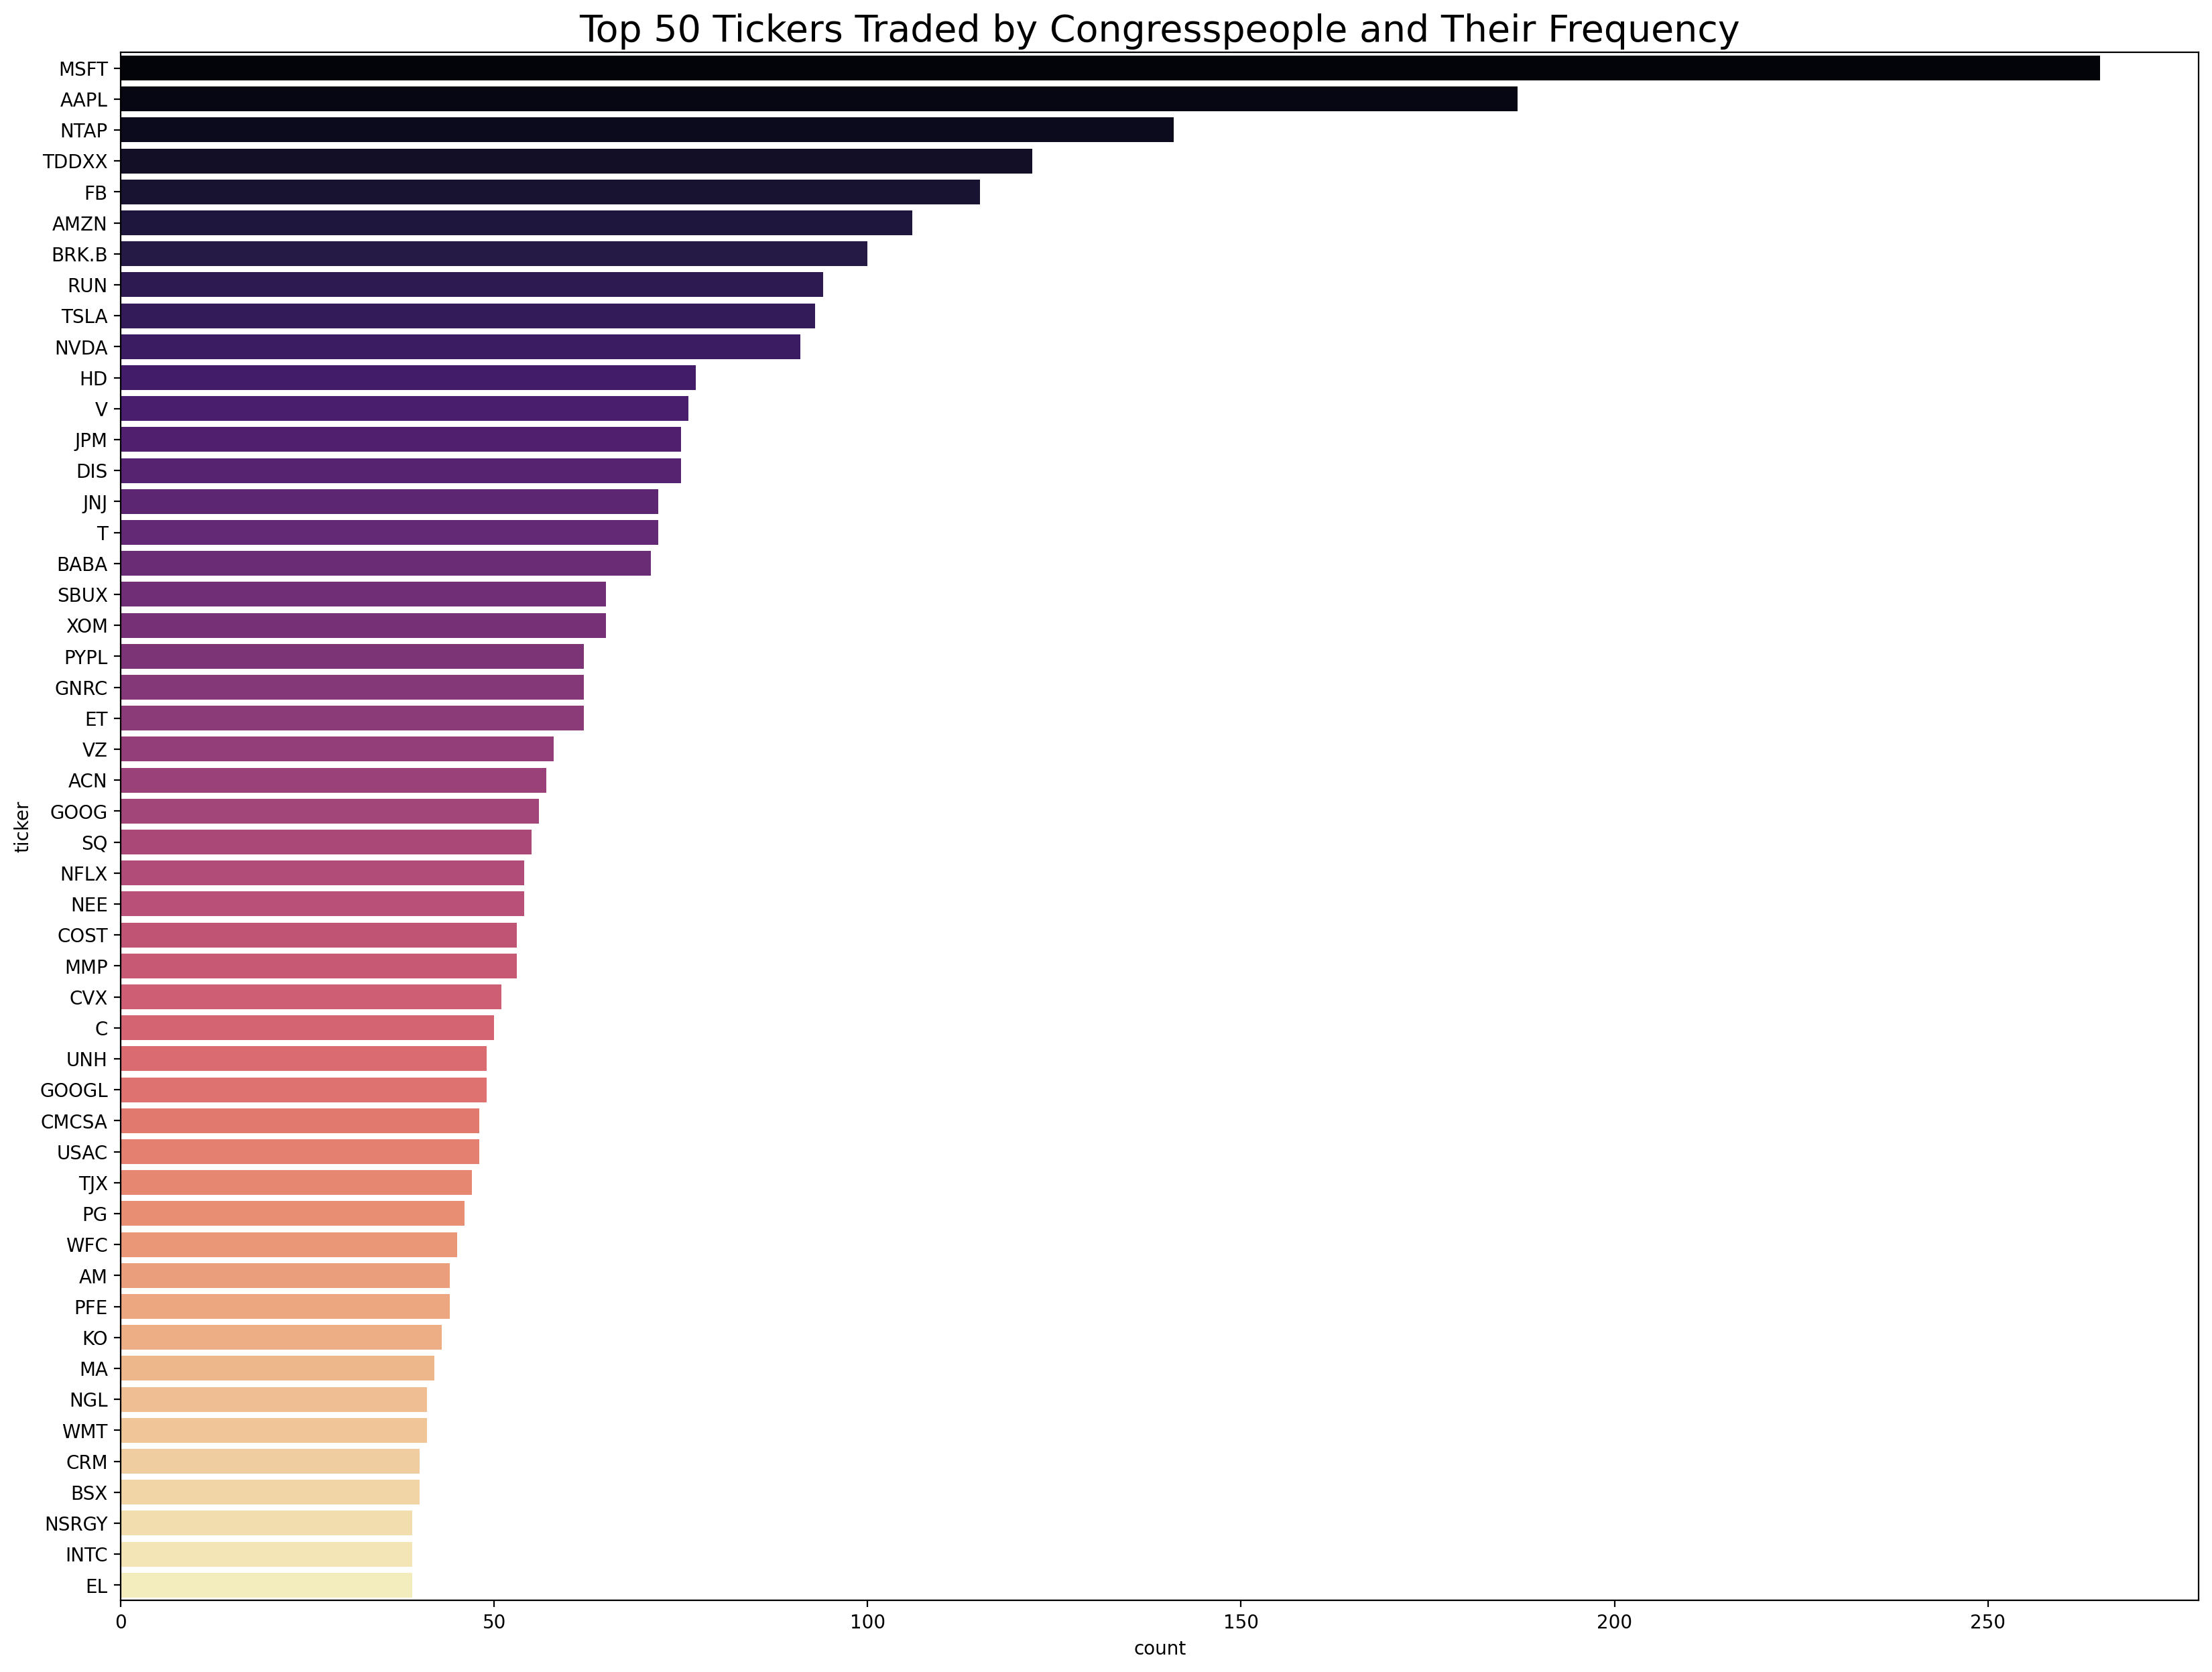

In [77]:
plt.figure(figsize=(20, 15))
sns.countplot(y='ticker', data=top, palette='magma', orient='h', order=top['ticker'].value_counts().index)
plt.title('Top 50 Tickers Traded by Congresspeople and Their Frequency', fontdict={'fontsize': 20})
plt.show()

#### Distributution of Representatives by Trading Frequency:

In [78]:
top_rep = cleaned.groupby('representative').count().sort_values('ticker',
                                                                     ascending=False).iloc[:30].index.to_list()
representatives = cleaned[cleaned['representative'].isin(top_rep)]
representatives.head()

,disclosure_year,owner,ticker,asset_description,type,amount,representative,cap_gains_over_200_usd,state,region
0,2021,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC,South
1,2021,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC,South
2,2021,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False,NC,South
3,2021,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False,NC,South
4,2021,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,False,CA,West


In order to see teh bars clearly, we will only plot the top 30 congressman who traded the most in this time period.

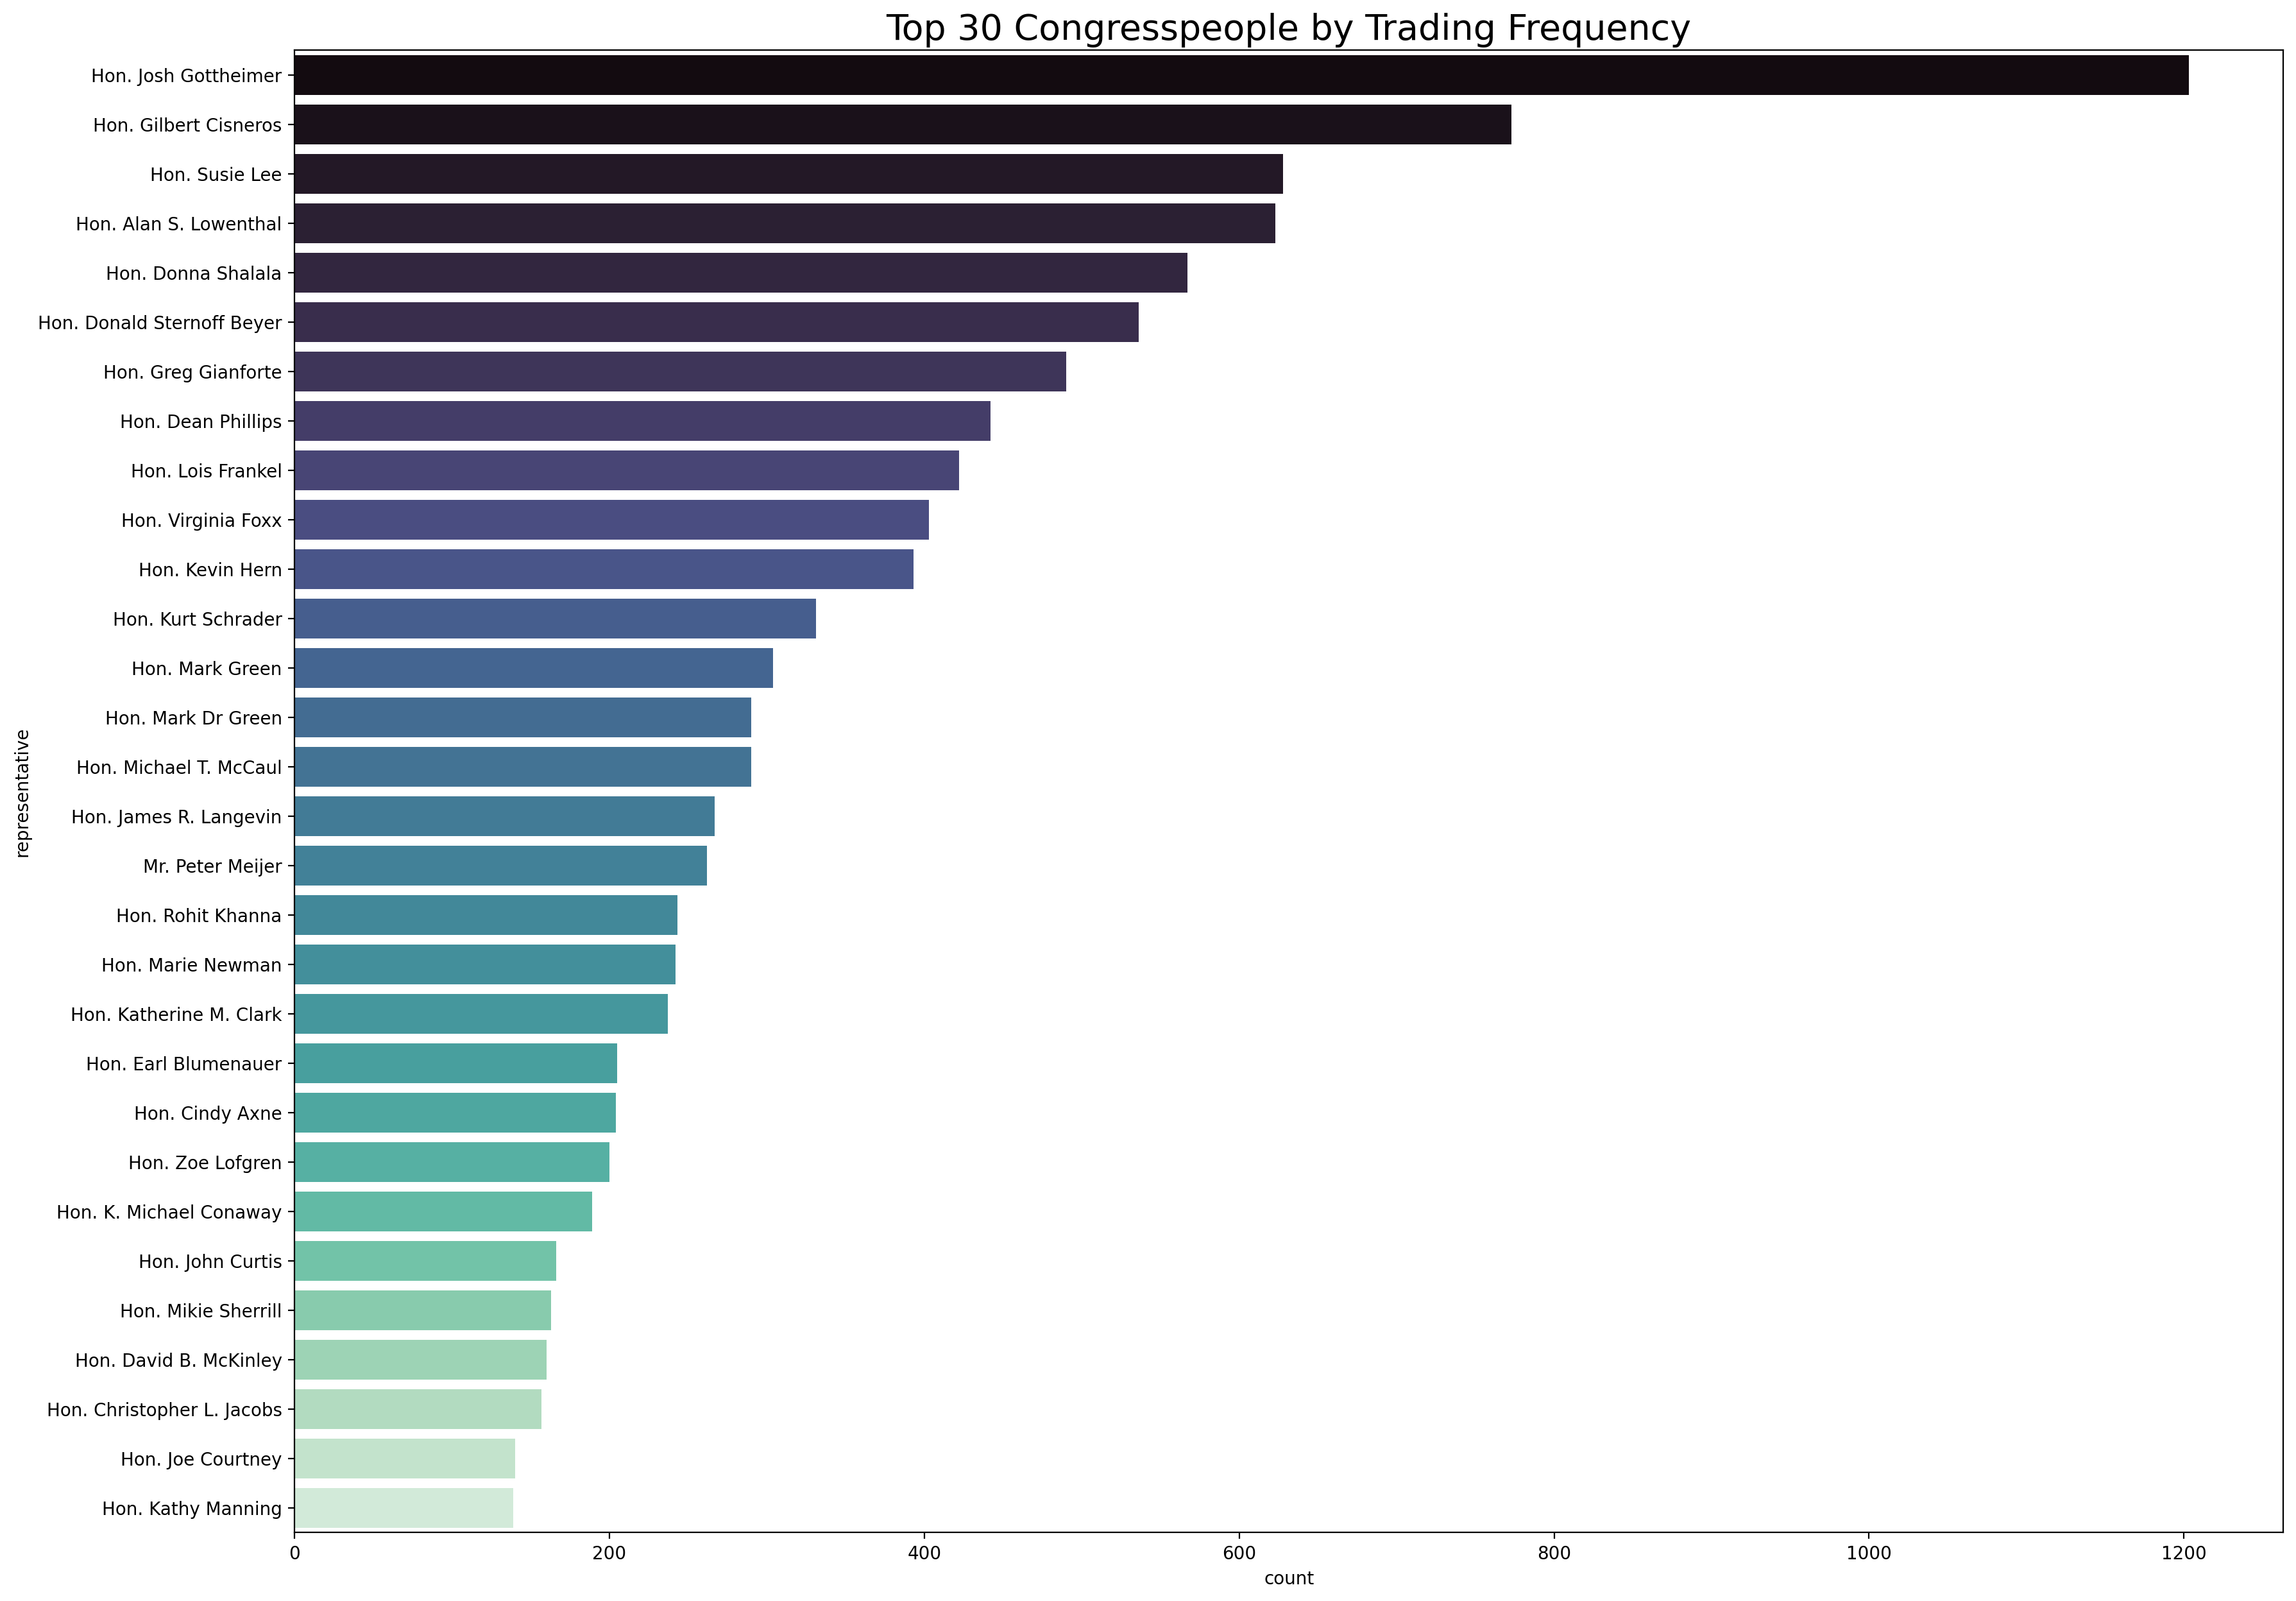

In [79]:
plt.figure(figsize=(20, 15))
sns.countplot(y='representative', data=representatives, palette='mako', orient='h', 
              order=representatives['representative'].value_counts().index)
plt.title('Top 30 Congresspeople by Trading Frequency', fontdict={'fontsize': 20})
plt.show()

#### Capital Gains Over 200:

In [80]:
cleaned['cap_gains_over_200_usd'].value_counts()

False    13467
True       936
Name: cap_gains_over_200_usd, dtype: int64

Percent of total trades that made over 200 usd profits:

In [81]:
cleaned.groupby('cap_gains_over_200_usd')['ticker'].count() / cleaned.shape[0]

cap_gains_over_200_usd
False    0.935014
True     0.064986
Name: ticker, dtype: float64

#### Distribution of Trades across States:

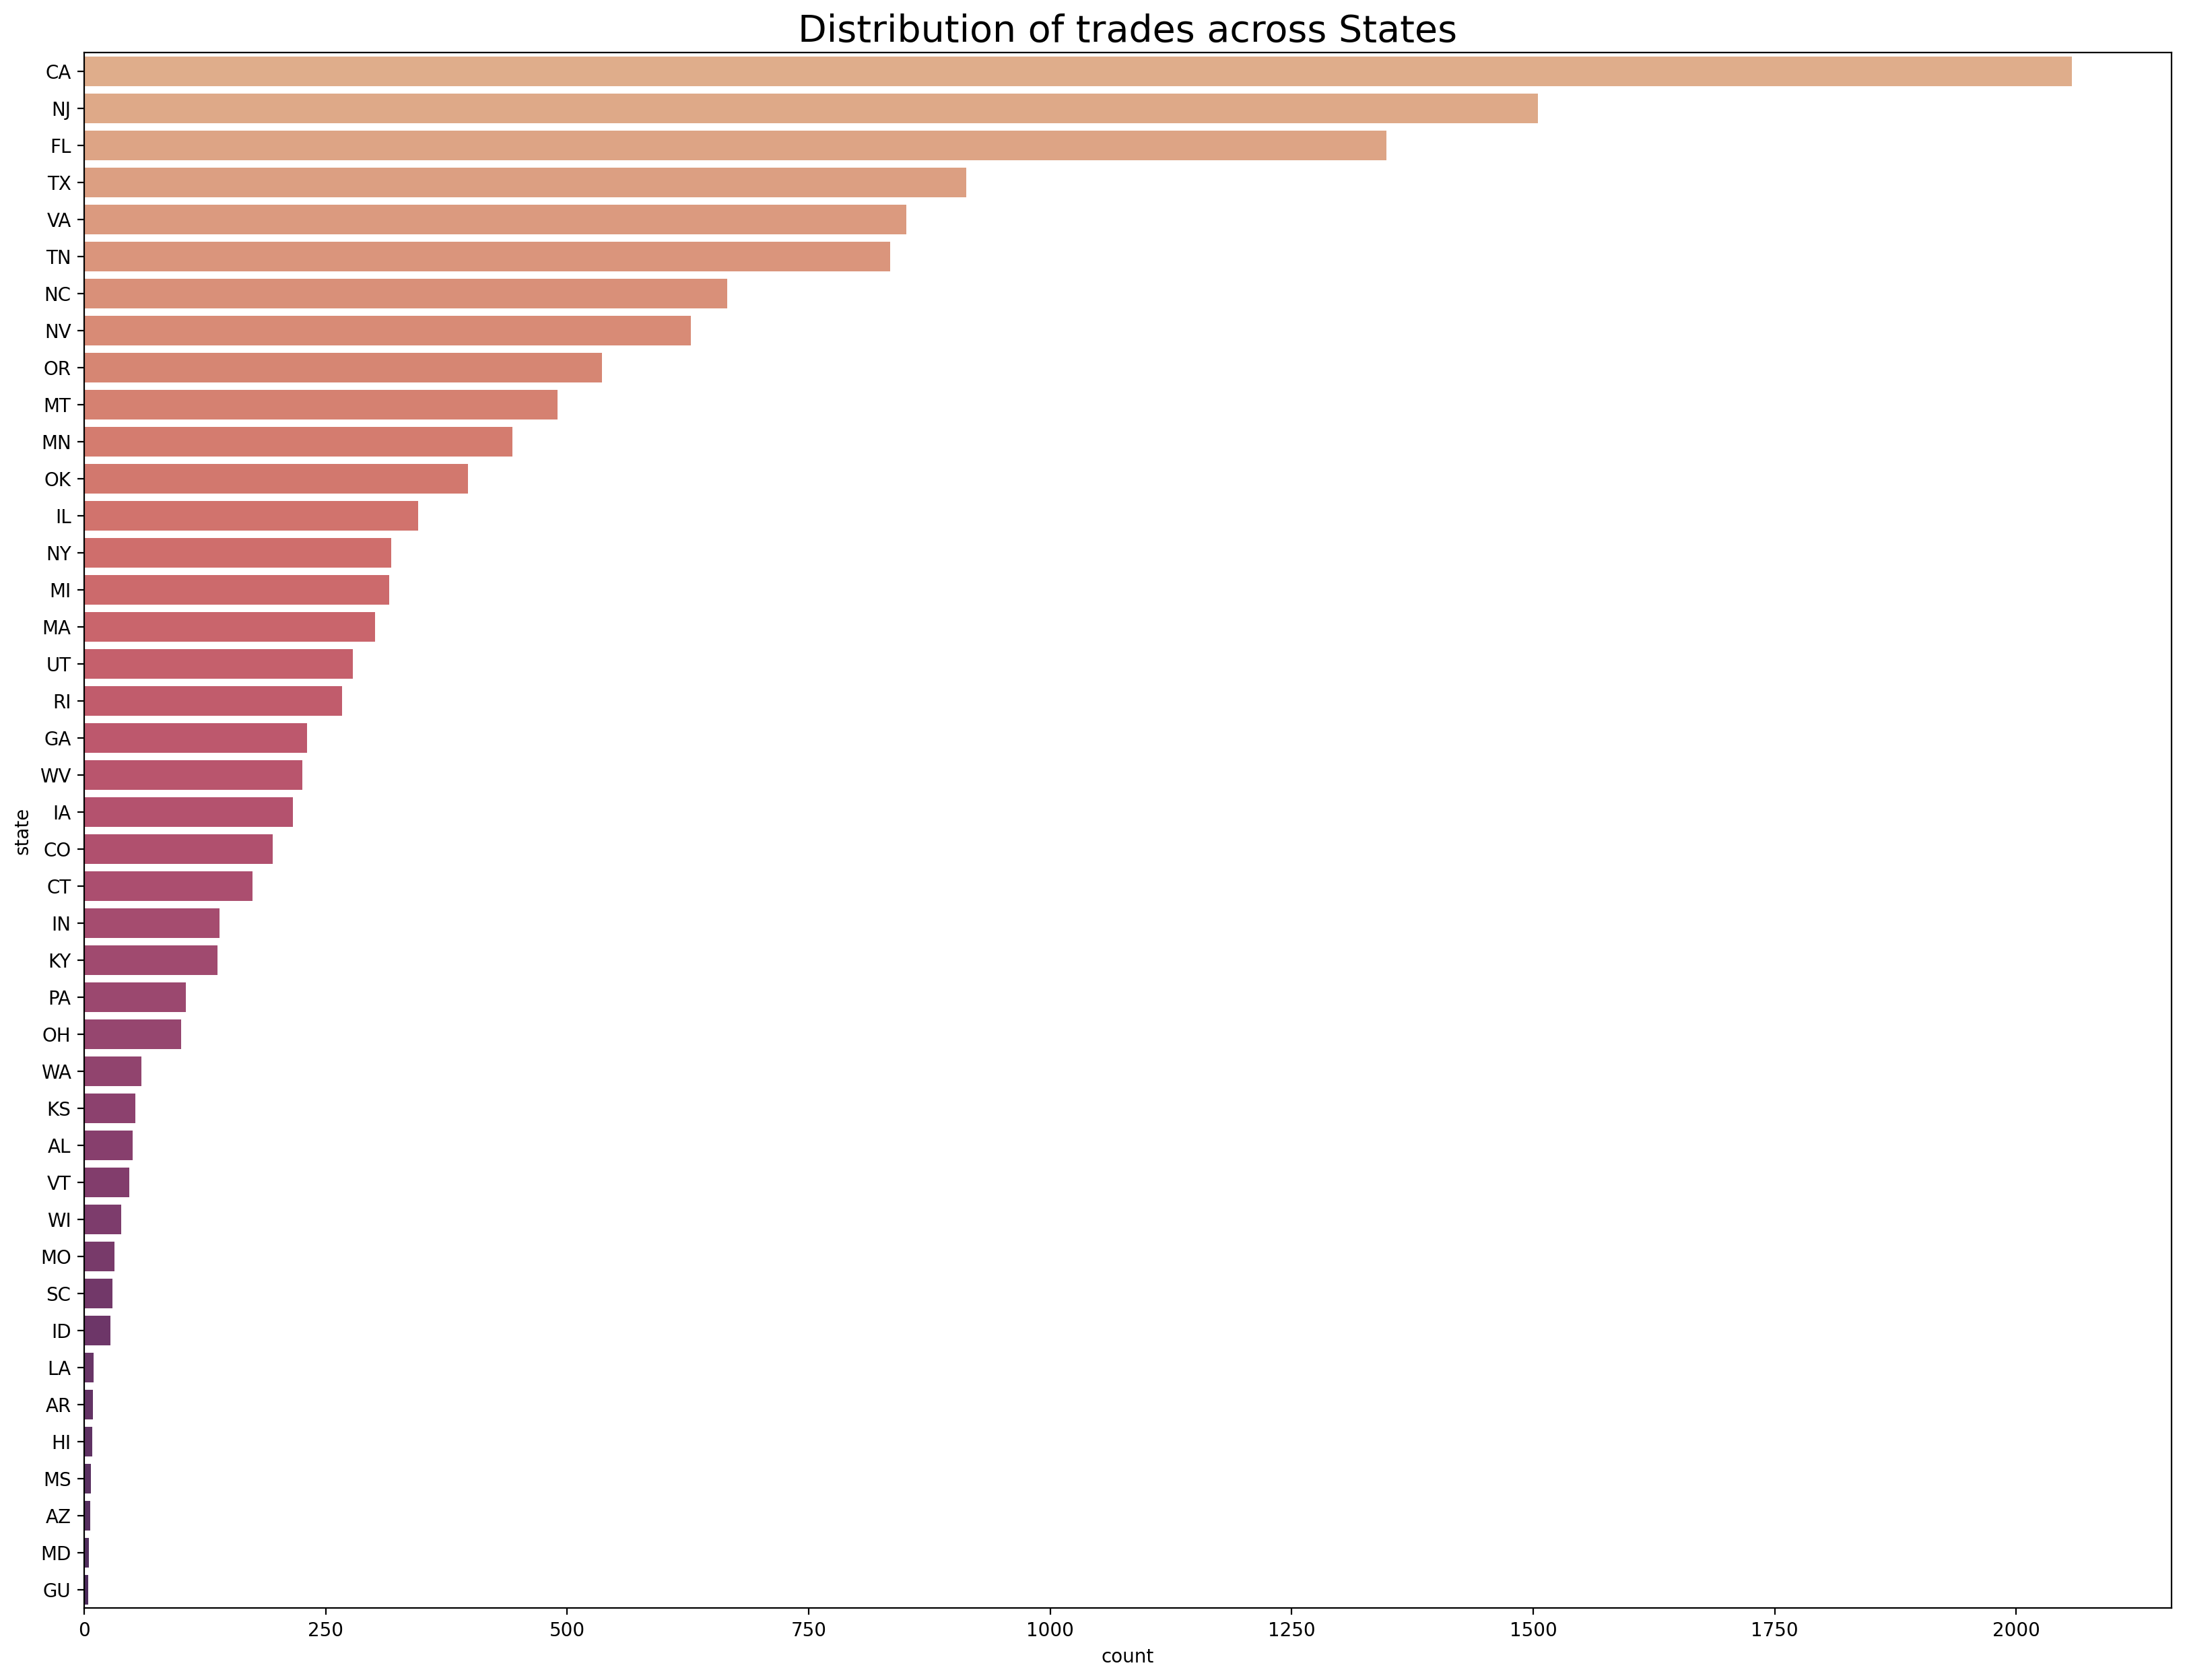

In [82]:
plt.figure(figsize=(20, 15))
sns.countplot(y='state', data=cleaned, palette='flare', orient='h', 
              order=cleaned['state'].value_counts().index)
plt.title('Distribution of trades across States', fontdict={'fontsize': 20})
plt.show()

#### Bivariate Analysis

Since all the columns in this dataset are categorical values instead of numeric values, we can't use scatterplot and box plot to show bivariate analysis. Therefore, we will use a countplot to determine their relationship.

In [83]:
cleaned.head()

,disclosure_year,owner,ticker,asset_description,type,amount,representative,cap_gains_over_200_usd,state,region
0,2021,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC,South
1,2021,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC,South
2,2021,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False,NC,South
3,2021,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False,NC,South
4,2021,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,False,CA,West


- **Amount distribution across regions**

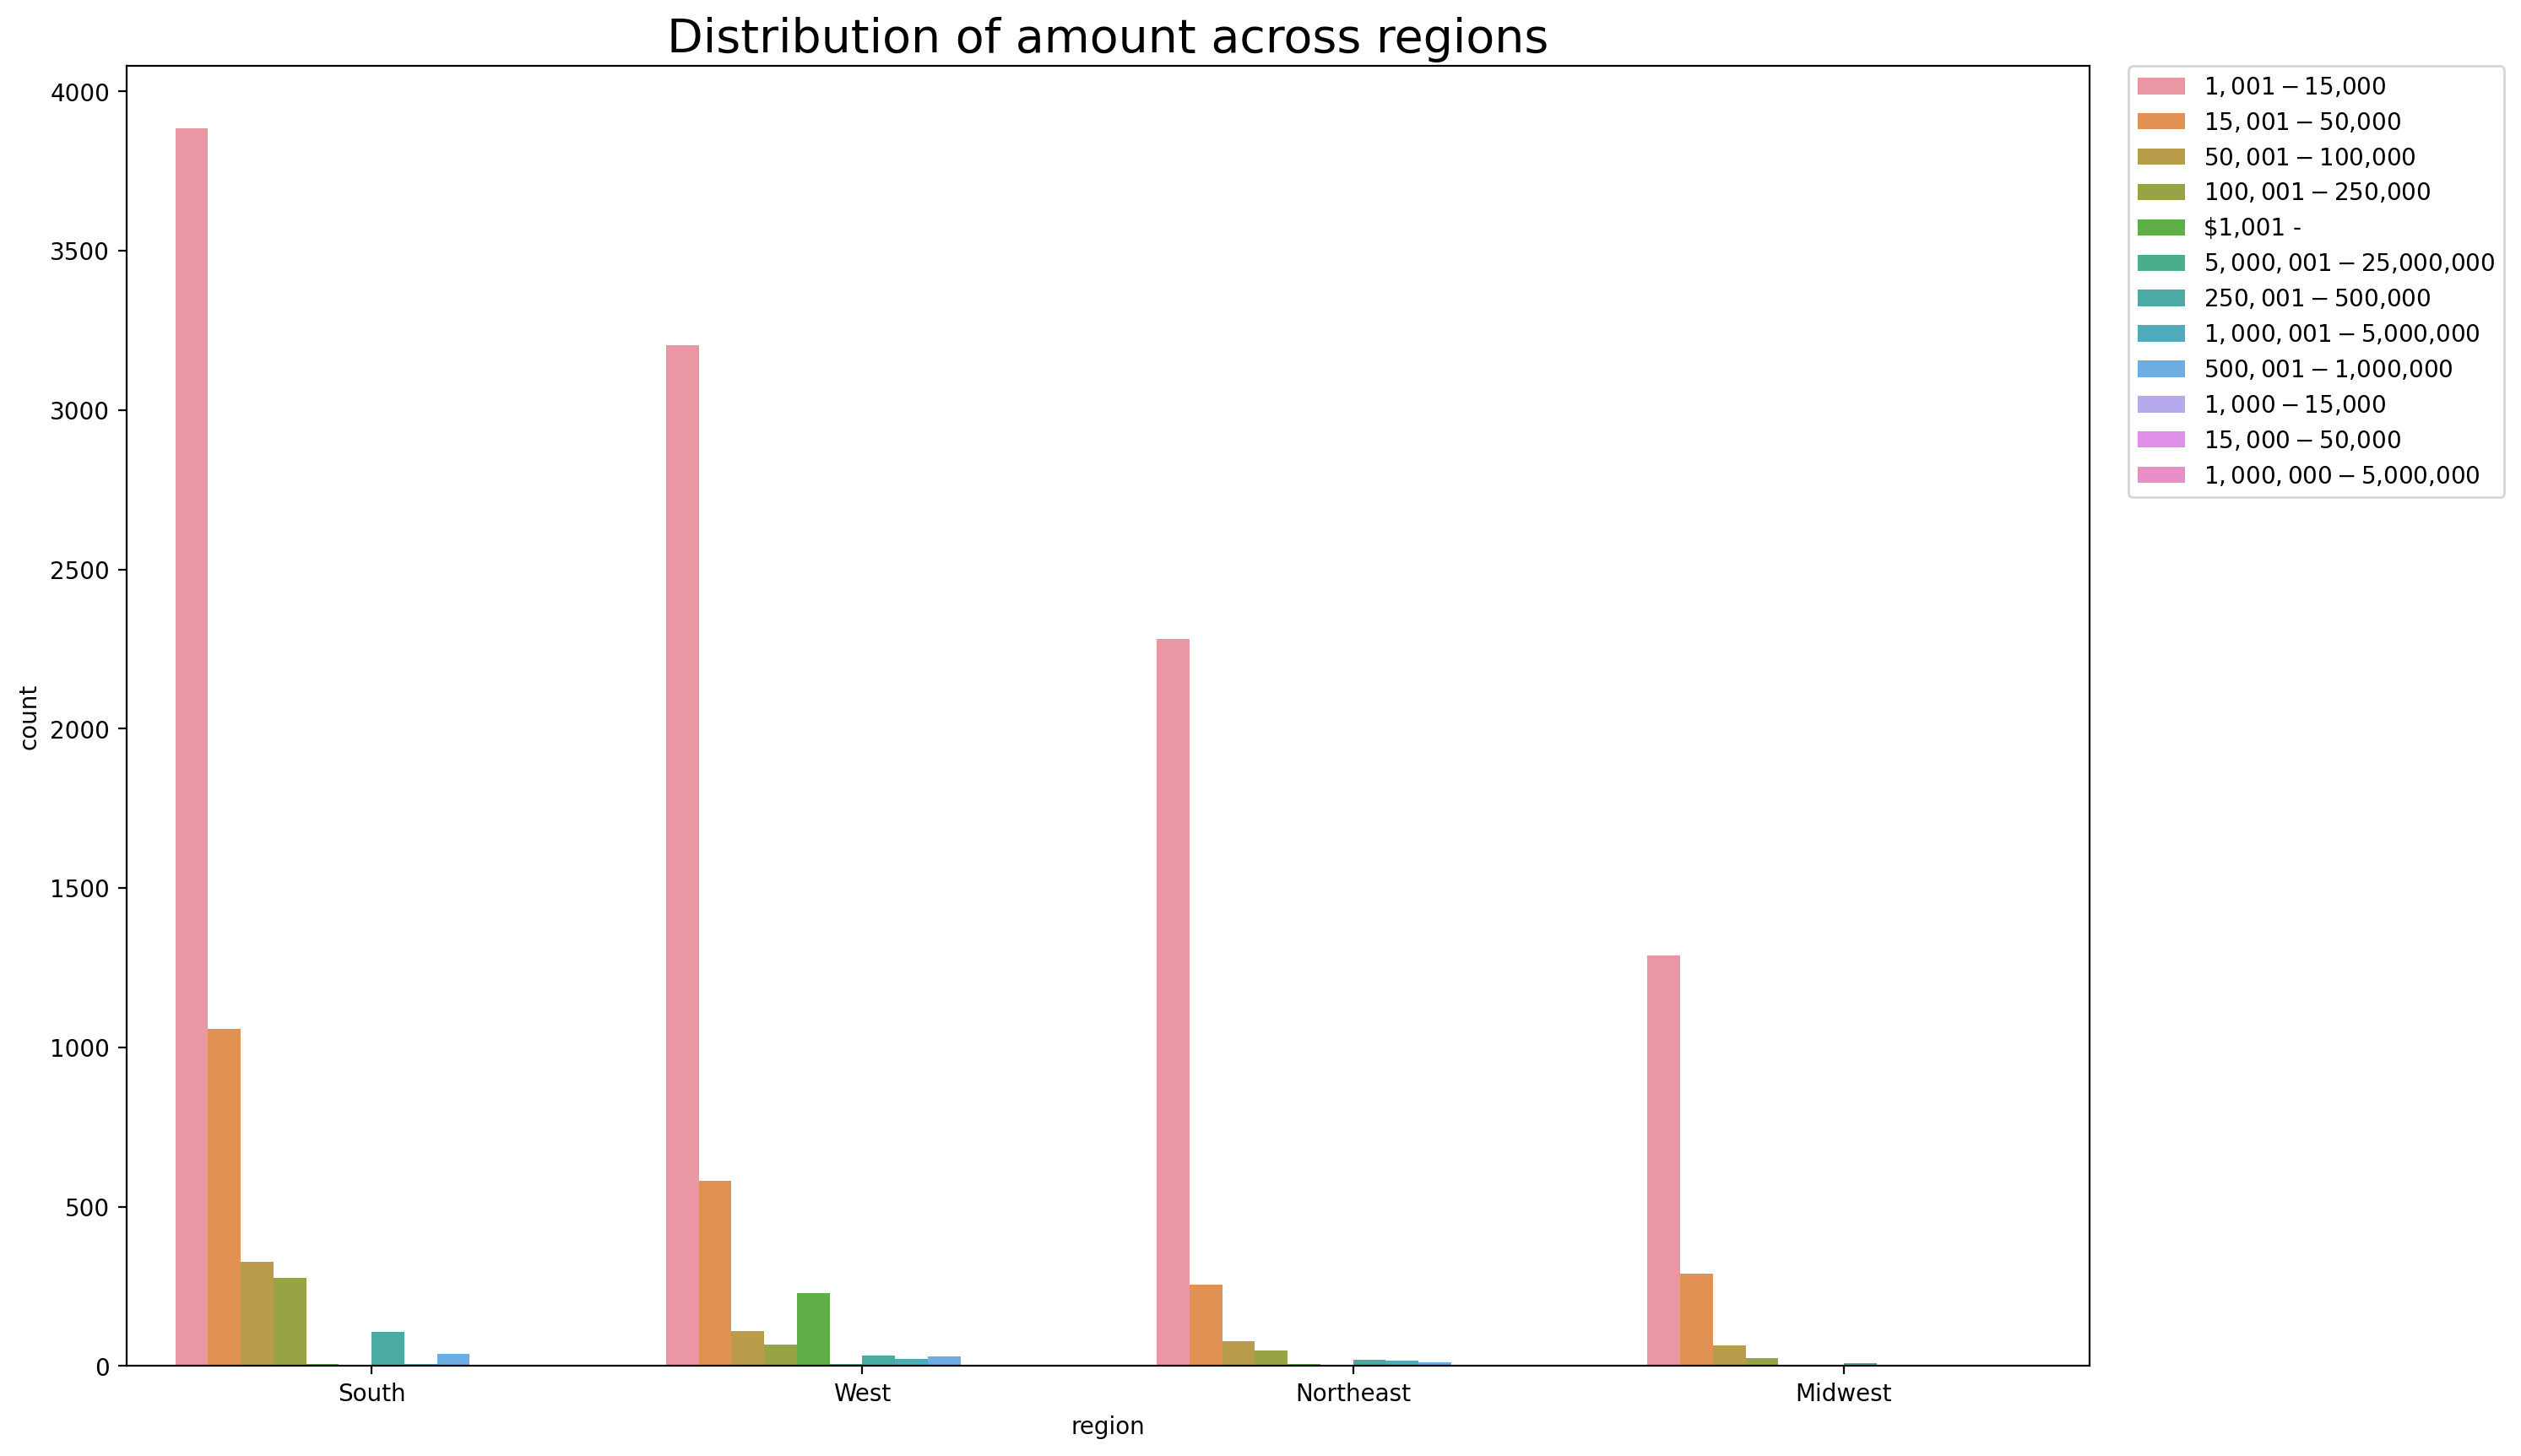

In [84]:
plt.figure(figsize=(15, 10))
sns.countplot(data=cleaned, x='region', hue='amount')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',borderaxespad=0)
plt.title('Distribution of amount across regions', fontdict={'fontsize': 20})
plt.show()

- **Region distribution across disclosure year**

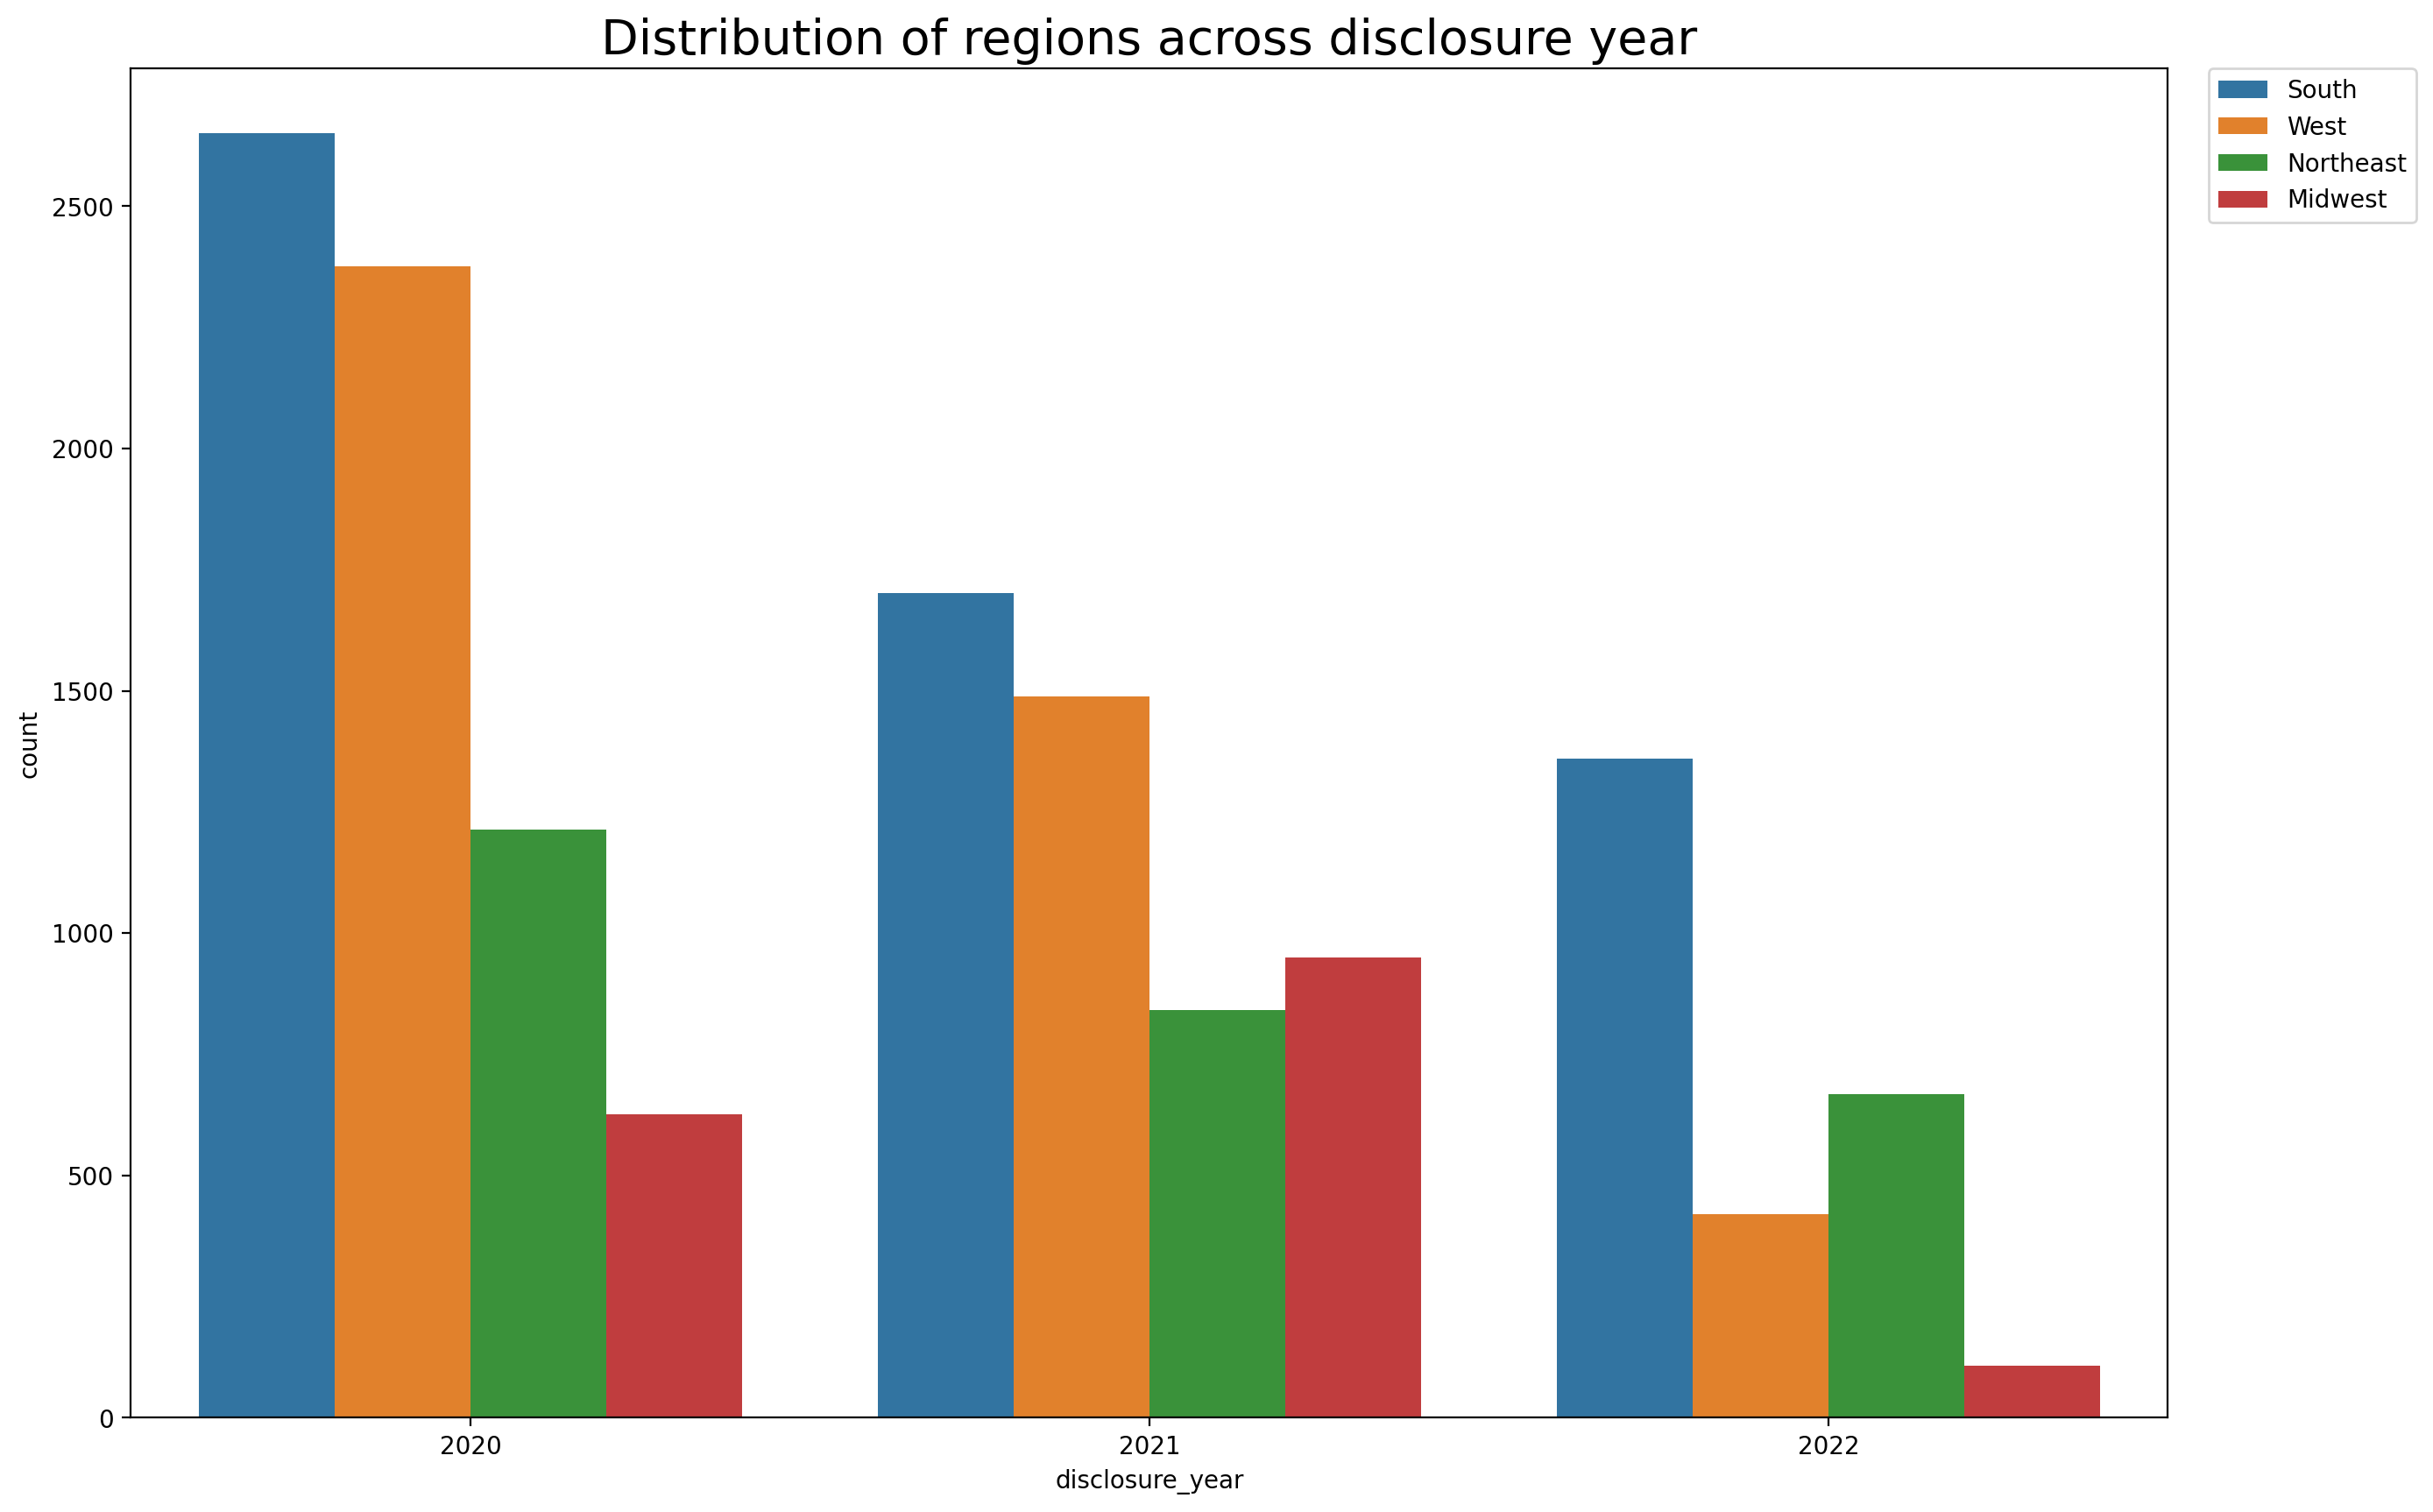

In [85]:
plt.figure(figsize=(15, 10))
sns.countplot(data=cleaned, x='disclosure_year', hue='region')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',borderaxespad=0)
plt.title('Distribution of regions across disclosure year', fontdict={'fontsize': 20})
plt.show()

- **Owner distribution across type**

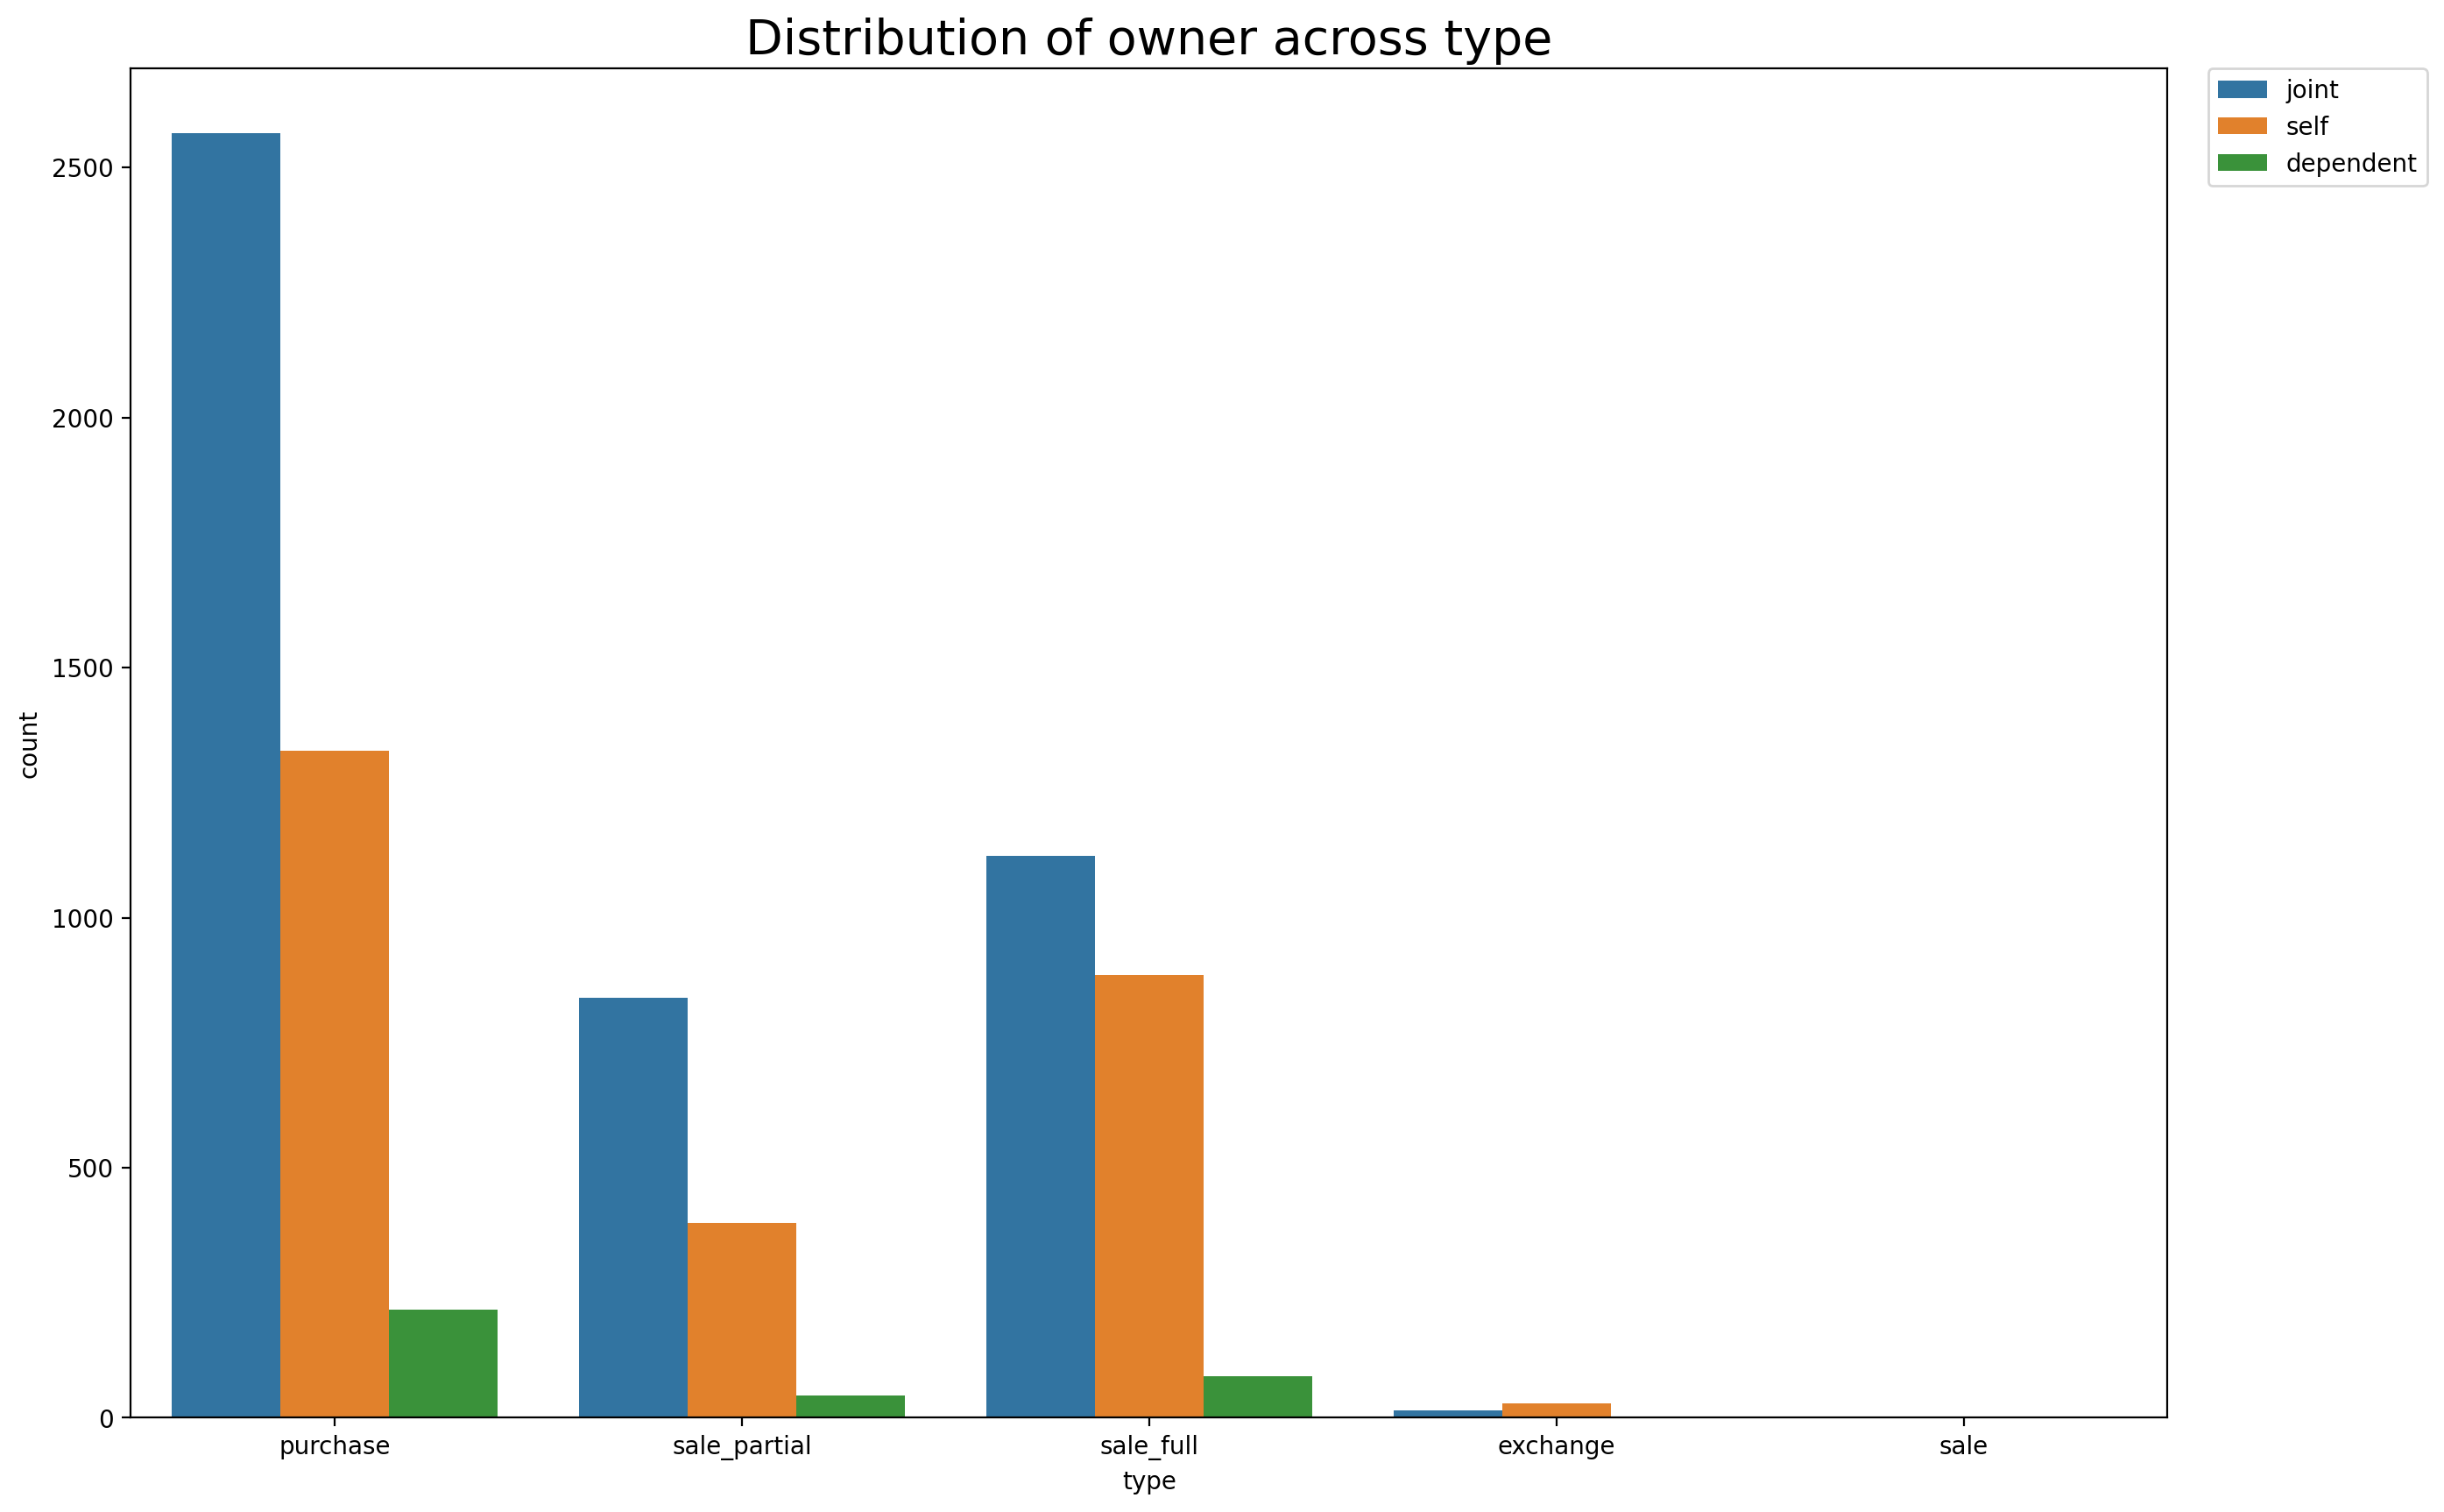

In [86]:
plt.figure(figsize=(15, 10))
sns.countplot(data=cleaned, x='type', hue='owner')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',borderaxespad=0)
plt.title('Distribution of owner across type', fontdict={'fontsize': 20})
plt.show()

- **Win rates within each type of trades across regions**

In [87]:
cleaned.pivot_table(index='region', columns='type', values='cap_gains_over_200_usd', aggfunc='mean', fill_value=0)

type,exchange,purchase,sale,sale_full,sale_partial
region,,,,,
Midwest,0,0.012987,0,0.338346,0.329004
Northeast,0,0.000858,0,0.090618,0.131579
South,0,0.000610,0,0.071429,0.092251
West,0,0.000435,0,0.064333,0.230942


It looks like that the sale_partial trades for all regions have the highest win rates.

#### Interesting Aggregates

- We can look at the **win rates across regions**

In [88]:
by_region = cleaned.groupby('region')['cap_gains_over_200_usd'].aggregate(['count', 'sum'])
by_region['win_rate'] = by_region['sum'] / by_region['count']
by_region

,count,sum,win_rate
region,,,
Midwest,1683,311,0.184789
Northeast,2722,166,0.060985
South,5713,184,0.032207
West,4285,275,0.064177


It looks like the Midwest has a significantly higher win rate than the other regions despite taking the lowest number of trades in total.

- **Win rates based on trading size**

In [89]:
cleaned.groupby('amount')['cap_gains_over_200_usd'].mean().sort_values(ascending=False)

amount
$250,001 - $500,000         0.088235
$50,001 - $100,000          0.084048
$15,001 - $50,000           0.083791
$1,001 -                    0.078189
$100,001 - $250,000         0.074163
$1,001 - $15,000            0.059386
$500,001 - $1,000,000       0.047619
$1,000,001 - $5,000,000     0.043478
$1,000 - $15,000            0.000000
$1,000,000 - $5,000,000     0.000000
$15,000 - $50,000           0.000000
$5,000,001 - $25,000,000    0.000000
Name: cap_gains_over_200_usd, dtype: float64

It seems that the medium-sized trades are the most profitable among all trading sizes.

### Assessment of Missingness

#### In this section, we will analyze closely the reason for the missingness in the `'ticker'` column.
In order to analyze the missingness of the data, we load in the original dataset again.

In [121]:
tran_permutation = pd.read_csv('all_transactions.csv')

# Drop some irrelavant columns
tran_permutation = tran_permutation.drop(columns=['ptr_link','district','disclosure_date','transaction_date'])
tran_permutation.head()

,disclosure_year,owner,ticker,asset_description,type,amount,representative,cap_gains_over_200_usd
0,2021,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False
1,2021,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False
2,2021,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False
3,2021,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False
4,2021,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,False


Since the original dataset is too large, we decide to sample the original dataset to a smaller one in order to analyze the missingness easier.

In [122]:
tran_permutation = tran_permutation.sample(frac=0.2, random_state=1).reset_index(drop=True)
tran_permutation.shape

(3140, 8)

In [123]:
# Replace '--' in the columns of 'ticker' and 'owner' with np.nan
tran_permutation['owner'] = tran_permutation['owner'].replace('--', np.nan)
tran_permutation['ticker'] = tran_permutation['ticker'].replace('--', np.nan)

# Add the column of 'ticker' missingness
tran_permutation['ticker_missing'] = tran_permutation['ticker'].isna()

#### Since all of these columns contain categorical values, we choose TVD as our test statistics and define the following function to compute it.

In [124]:
def group_tvd(df, ind):
    cnts = df.pivot_table(index=ind, columns='ticker_missing', aggfunc='size')
    distr = cnts / cnts.sum() # normalize
    return distr.diff(axis=1).iloc[:, -1].abs().sum() / 2 

#### First, we perform permutation tests to analyze the dependency of the missingness in `'ticker'` on the `'amount'` column.
* **Question:** Is `'ticker'` missing at random, or **dependent on** `'amount'`?
    * Are the distributions of `'amount'` similar when `'ticker'` is missing vs. not missing?
    * **Null Hypothesis**: The distribution of values in `'amount'` is the same whether or not `'ticker'` is missing.
    * **Alternative Hypothesis**: The distribution of values in `'amount'` is different when the values in `'ticker'` is missing and when they are not.
    * Significance level: 0.01

In [125]:
# Simulation process
np.random.seed(24)
n_repetitions = 1000
differences = []
to_shuffle = tran_permutation.copy()

for _ in range(n_repetitions):
    
    to_shuffle['ticker_missing'] = np.random.permutation(to_shuffle['ticker_missing'])
    differences.append(group_tvd(to_shuffle, 'amount'))
    
differences[:5]

[0.052911467160016316,
 0.04059288720085199,
 0.046371179350967226,
 0.05538917756248155,
 0.02745353505809779]

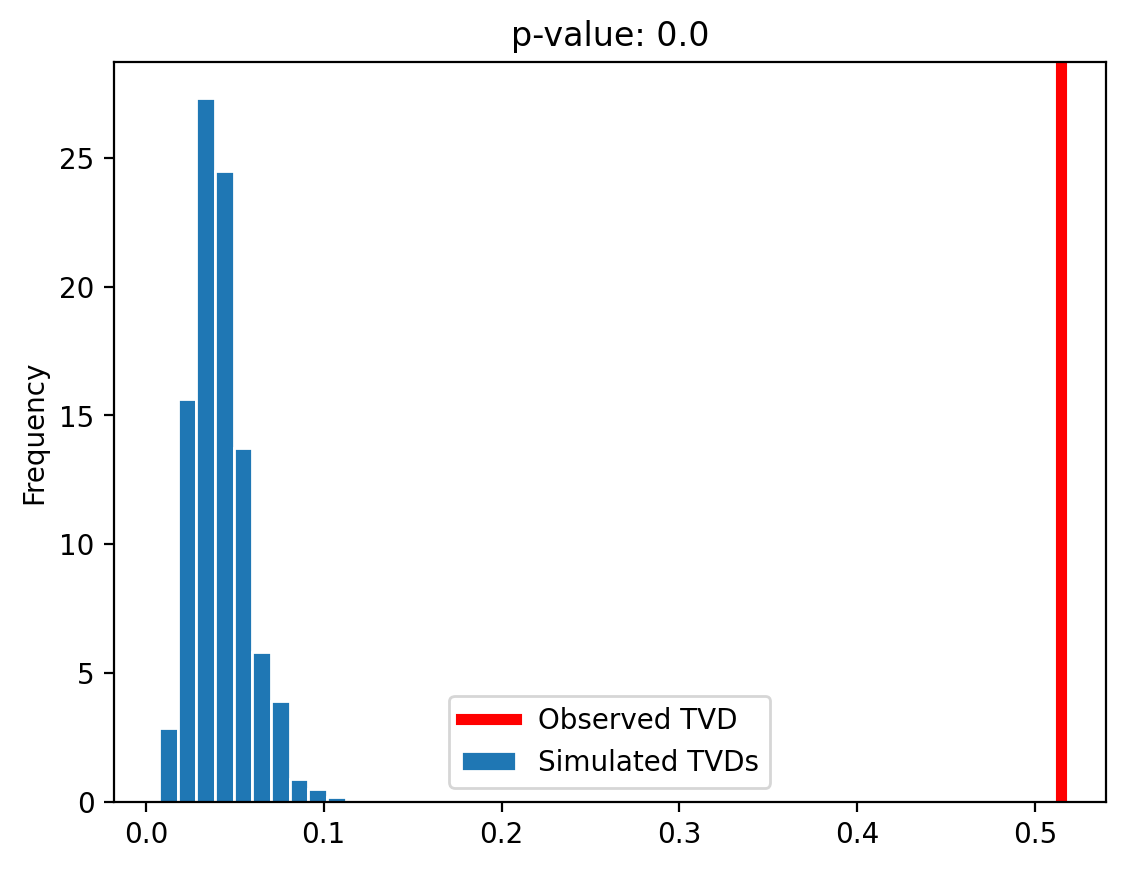

In [126]:
# Calculate the observed TVD
observed_tvd = group_tvd(tran_permutation, 'amount')

# Calculate the p-value
p_value = (differences >= observed_tvd).mean()

# Plot the graph
pd.Series(differences).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {p_value}', label='Simulated TVDs')
plt.axvline(x=observed_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();

#### With a p-value of 0.0,  we reject the null and conclude that the distribution of `'amount'` is not the same when `'ticker'` is missing and when it is not.
This means that the missingness of `'ticker'` is correlated with the column `'amount'`. Therefore, we conclude that the missingness mechanisms of `'ticker'` is MAR on the column `'amount'`.

#### Next, we will perform another permutation test to analyze the relationship between the missingness in `'ticker'` and the column 'cap_gains_over_200_usd'.
* **Question:** Is `'ticker'` missing at random, or **dependent on `'cap_gains_over_200_usd'`**?
    * Is the distribution of `'cap_gains_over_200_usd'` similar when ticker is missing vs. not missing?
    * **Null Hypothesis**: The distribution of `'cap_gains_over_200_usd'` is the same whether or not `'ticker'` is missing.
    * **Alternative Hypothesis**: The distribution of values in `'cap_gains_over_200_usd'` is different when the values in `'ticker'` is missing and when they are not.
    * Significance level: 0.01

In [117]:
# Simulation process
np.random.seed(24)
n_repetitions = 1000
differences = []
to_shuffle = tran_permutation.copy()

for _ in range(n_repetitions):
    
    to_shuffle['ticker_missing'] = np.random.permutation(to_shuffle['ticker_missing'])
    differences.append(group_tvd(to_shuffle, 'cap_gains_over_200_usd'))
    
differences[:5]

[0.01803039865877572,
 0.02151780578836814,
 0.01803039865877572,
 0.004847663843061102,
 0.03030629566551116]

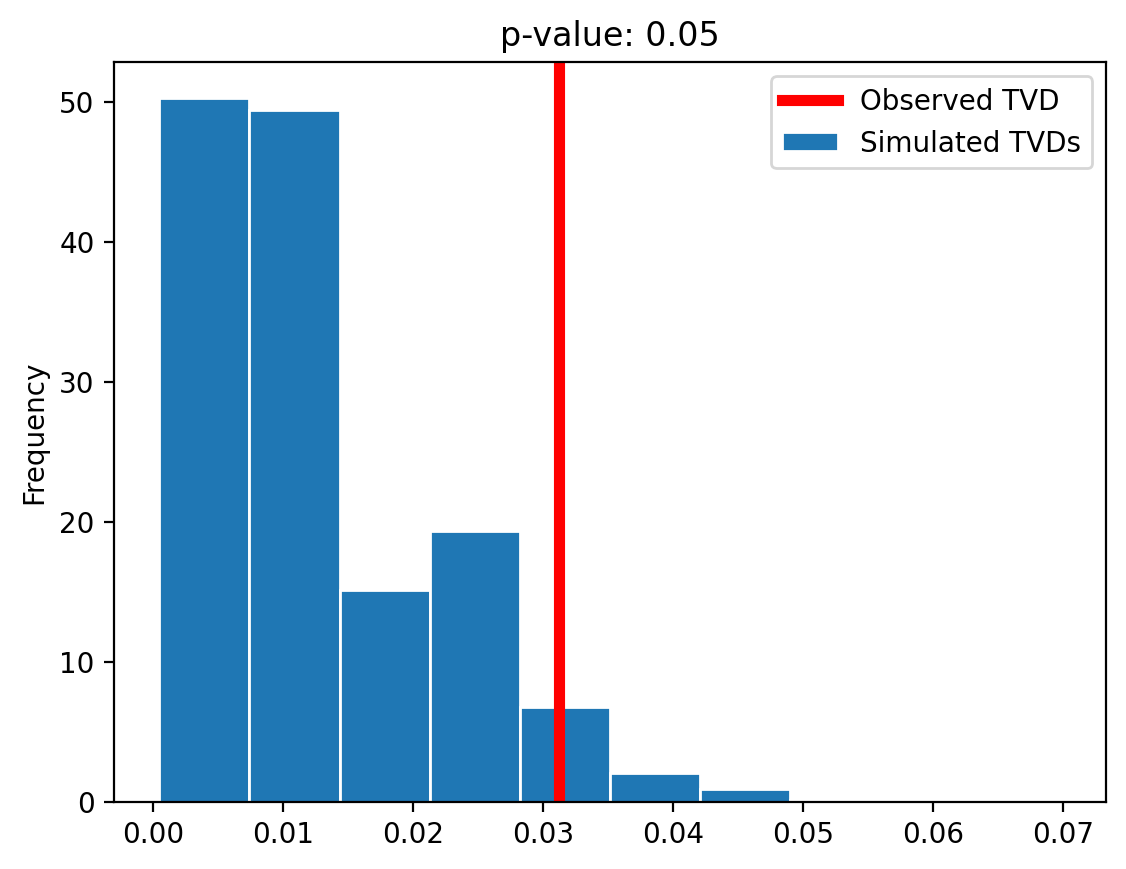

In [118]:
# Calculate the observed TVD
observed_tvd = group_tvd(tran_permutation, 'cap_gains_over_200_usd')

# Calculate the p value
p_value = (differences >= observed_tvd).mean()

# Plot the graph
pd.Series(differences).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {p_value}', label='Simulated TVDs')
plt.axvline(x=observed_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();

**With a p-value of 0.05, we fail to reject the null and conclude that we do not have sufficient evidence suggest that the distribution of `'cap_gains_over_200_usd'` when `'ticker'` is missing is the same as the distribution of `'cap_gains_over_200_usd'` when `'ticker'` is not missing.**

This means that the missingness of `'ticker'` is likely not correlated with the values in the column `'cap_gains_over_200_usd'`. 

## Hypothesis Test

**In this section, we will finally test our research question.**
**We are interested in finding out if the number of times a ticker is traded is related to the profitability of that ticker. Here, we are using the win rate in terms of the proportion of trades that made a profit of over 200 usd as our measure for profitability.**<br>

We hypothesize that the tickers that are traded the most make the most profits, thus will have higher win rates. 
To test our hypothesis, we will perform a hypothesis test using the average win rate of the top 10 traded tickers as our test statistic, with a 0.01 significance level. 
We are using the aggregate of the top 10 traded tickers's trades and calculating an average win rate this way because individual tickers might have influences that have impacted the win rate of that ticker in one way or another; therefore, summing up the top 10 traded tickers and getting an average win rate would be a better representation of the win rates of the top-traded tickers.<br>

- <b>Null hypothesis:</b> The number of times a ticker is traded and win rates are not related. (the relatively high average win rate of the top 10 most-traded tickers is due to chance alone)
<br>
- <b>Alternative hypothesis:</b> The number of times a ticker is traded is related to the win rate. (the relative high average win rate of the top most-traded tickers is not due to chance alone)

#### Getting the top 10 most-traded tickers:

In [98]:
top_10 = cleaned.groupby('ticker')['cap_gains_over_200_usd'].aggregate(['count', 'sum']) \
          .sort_values('count', ascending=False)[:10]
top_10

,count,sum
ticker,,
MSFT,265,10
AAPL,187,23
NTAP,141,1
TDDXX,122,0
FB,115,9
AMZN,106,12
BRK.B,100,4
RUN,94,11
TSLA,93,11


**Since ticker TDDXX has no winning trades but is traded many times**, we decide to regard it as an outlier and drop it from our 
dataset so that the extreme won't affect our overall win rate. We will therefore precede with our test using **the top 9 traded tickers.**

In [99]:
top_9 = top_10.drop('TDDXX', axis=0)
top_9

,count,sum
ticker,,
MSFT,265,10
AAPL,187,23
NTAP,141,1
FB,115,9
AMZN,106,12
BRK.B,100,4
RUN,94,11
TSLA,93,11
NVDA,91,11


We will drop those rows associated with **TDDXX** from the overall dataset as well.

In [100]:
cleaned = cleaned[cleaned['ticker'] != 'TDDXX']
cleaned.head()

,disclosure_year,owner,ticker,asset_description,type,amount,representative,cap_gains_over_200_usd,state,region
0,2021,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC,South
1,2021,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,False,NC,South
2,2021,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False,NC,South
3,2021,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,False,NC,South
4,2021,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,False,CA,West


#### Observed Statistic:
Since we are viewing the top 9 traded tickers as a whole, we will take the average win rate of the 9 tickers as our test statistic.

In [101]:
obs_win = top_9.sum(axis=0)['sum'] / top_9.sum(axis=0)['count']
obs_win

0.07718120805369127

#### Under the null hypothesis, the average win rate of the top 10 most-traded tickers should be equal to the overall win rate of all trades. Here, we calculate the average win rate of all trades to use as comparison to our observed win rate.

In [102]:
avg_win = cleaned[cleaned['cap_gains_over_200_usd']].shape[0] / cleaned.shape[0]
avg_win

0.06554162873748337

#### Simulation:

In [112]:
sim_win = []
sample_size = top_9['count'].sum()
np.random.seed(24)

for i in np.arange(1000):
    random_sample = cleaned.sample(sample_size)
    win_rate = random_sample['cap_gains_over_200_usd'].mean()
    sim_win.append(win_rate)

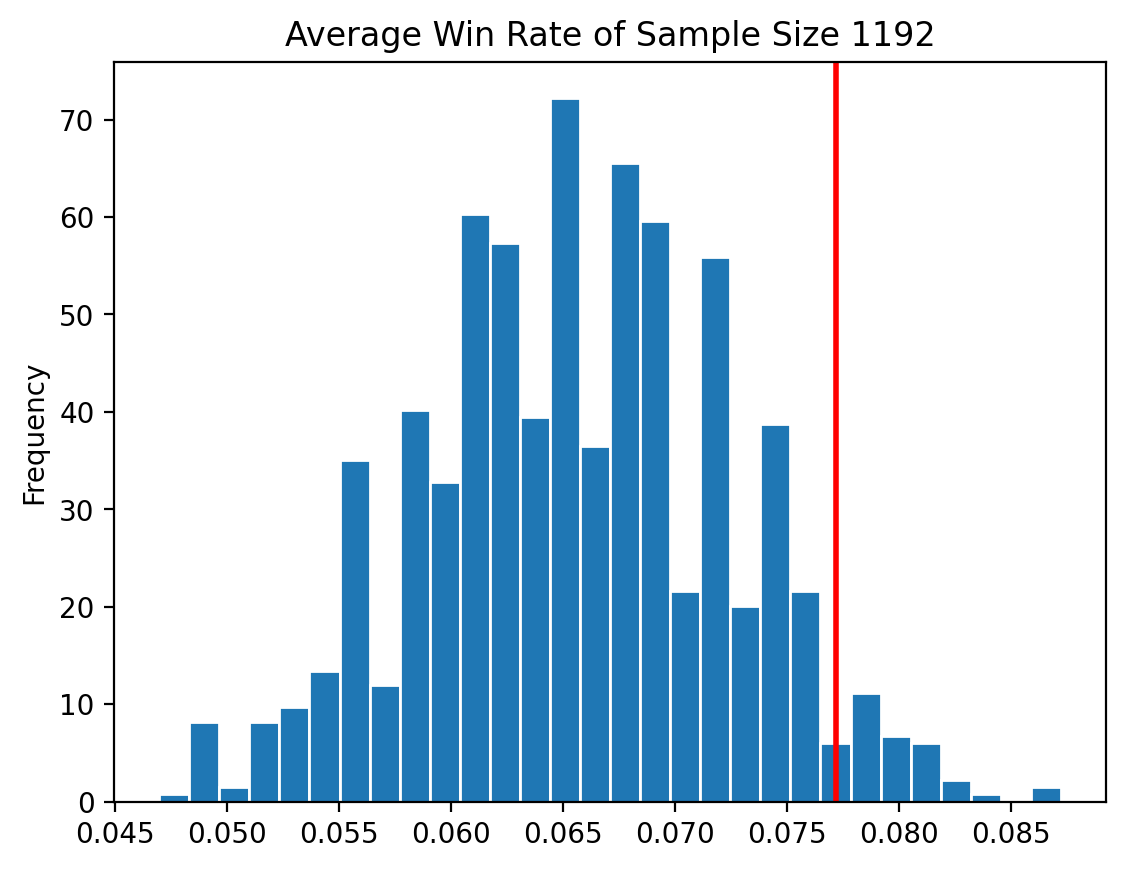

In [113]:
pd.Series(sim_win).plot(kind='hist', 
                         density=True,
                         bins=30,
                         ec='w',
                         title='Average Win Rate of Sample Size 1192');

plt.axvline(x=obs_win, color='red', linewidth=2);

#### Calculating the P-value:

In [114]:
p_value = (sim_win >= obs_win).mean()
p_value

0.046

### Conclusion:
With a p-value of 0.046, we failed to reject the null. This means that we did not find sufficient evidence of the top 9 traded tickers having a higher average win rate, which suggests that the number of times a ticker is traded is likely not related to the win rate, and the relatively high win rate of the most traded tickers might be due to chance alone. 

### Future Improvements:
For future studies, if we are able to gain access to data on the exact dollar-amount returns on each trade, we can define winning trades much more accurately and quantify profitability to test more specific hypotheses. Moreover, if we were to test the same hypothesis again, it would be best if we have data on the number of years each representative have been trading, which can be a measure for the representatives' relative knowledge and skills in trading. With this data, we can then filter out trades taken by beginner traders to remove some noise from the dataset before we precede to test our hypothesis. This would, to some degree, reduce the effects of confounding variables in exploring the relationship between the trading volume and win rate.